In [20]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

In [3]:
# Make a reference to the Chicago_Energy_Benchmarking_20240408.csv file path
csv_path = Path("Chicago_Energy_Benchmarking_20240408.csv")

# Import the Chicago_Energy_Benchmarking_202404.csv file as a DataFrame
df = pd.read_csv(csv_path, encoding="utf-8")

# Check the data imported correctly
df.head()

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2020,252064,Mansueto Library,Submitted Data,1100 E 57th St,60637,2.0,False,HYDE PARK,Library,...,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950,"(41.79221307, -87.59994981)",2020-252064
1,2020,232458,Harper Square Cooperative,Submitted Data,4800 - 4850 S Lake Park Ave,60615,1.0,False,KENWOOD,Multifamily Housing,...,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264,"(41.80747487, -87.59126397)",2020-232458
2,2020,254616,Former Coyne College,Submitted Data,330 N Green St,60607,2.0,False,NEAR WEST SIDE,Office,...,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,"(41.873335, -87.65102071)",2020-254616
3,2020,103812,400 W Superior St,Submitted Data,400 W Superior St,60654,3.0,False,NEAR NORTH SIDE,Office,...,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,"(41.89575232, -87.638901)",2020-103812
4,2020,254073,Blue Moon Lofts,Submitted Data,215 N. Aberdeen St.,60607,4.0,False,NEAR WEST SIDE,Multifamily Housing,...,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175,"(41.87429514, -87.65017516)",2020-254073


In [4]:
# Remove unnecessary columns from the DataFrame and save the new DataFrame
# Only keep: "Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
#"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
# "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
# "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
# "Latitude", "Longitude", 

reduced_df = df[["Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
 "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
 "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
 "Latitude", "Longitude"]]
reduced_df.head()

,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,2020,252064,Mansueto Library,1100 E 57th St,2.0,False,HYDE PARK,Library,64028.0,2009.0,2384738.9,NaN,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175


In [5]:
# Get value counts - number of rows by year
reduced_df["Data Year"].value_counts()

Data Year
2022    3613
2020    3582
2021    3550
2019    3438
2018    3430
2017    2797
2016    2717
2015    1521
2014     243
Name: count, dtype: int64

In [6]:
reduced_df["Primary Property Type"].value_counts().tail(25)


Primary Property Type
Adult Education                                     23
Other - Public Services                             19
Other - Lodging/Residential                         19
Social/Meeting Hall                                 18
Courthouse                                          17
Outpatient Rehabilitation/Physical Therapy          17
Other - Education                                   16
Data Center                                         16
Prison/Incarceration                                15
Bank Branch                                         14
Pre-school/Daycare                                  14
Convention Center                                   11
Repair Services (Vehicle, Shoe, Locksmith, etc.)    10
Lifestyle Center                                     7
Other - Services                                     7
Urgent Care/Clinic/Other Outpatient                  7
Ambulatory Surgical Center                           6
Indoor Arena                               

In [7]:
# To aggregate Primary Property types into Building Sectors, first create lists that include the property types 
# for each building sector, with building sectors as names

office = ["Bank Branch", "Financial Office", "Office"]
multifamily_housing = ["Multifamily Housing"]
schools = ["K-12 School"]
healthcare = ["Ambulatory Surgical Center",  "Outpatient Rehabilitation/Physical Therapy", "Urgent Care/Clinic/Other Outpatient", 
              "Hospital (General Medical & Surgical)", "Medical Office", "Other - Specialty Hospital"]
college_university = ["College/University"]
lodging = ["Hotel", "Residential Care Facility", "Senior Care Community", "Residence Hall/Dormitory", 
           "Other - Lodging/Residential"]
retail = ["Automobile Dealership", "Vehicle Dealership", "Enclosed Mall", "Other - Mall", "Lifestyle Center", "Strip Mall", "Retail Store", 
          "Supermarket/Grocery Store", "Wholesale Club/Supercenter", "Other - Services", "Repair Services"]



In [8]:
# Create an empty list to put the building sector results in
building_sectors = []

# use a for loop to create a list Building Sectors for each row
for type in reduced_df["Primary Property Type"]:
    if type in office:
        building_sectors.append("Office")
    elif type in multifamily_housing:
        building_sectors.append("Multifamily Housing")
    elif type in schools:
        building_sectors.append("K-12 Schools")
    elif type in healthcare:
        building_sectors.append("Healthcare")
    elif type in college_university:
        building_sectors.append("College/University")
    elif type in lodging:
        building_sectors.append("Lodging")
    elif type in retail:
        building_sectors.append("Retail")
    else:
        building_sectors.append("Other")


print(len(building_sectors))

w_sectors_df= reduced_df.assign(Building_Sector=building_sectors)

w_sectors_df.head()

24891


,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,...,Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Building_Sector
0,2020,252064,Mansueto Library,1100 E 57th St,2.0,False,HYDE PARK,Library,64028.0,2009.0,...,NaN,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950,Other
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,...,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264,Multifamily Housing
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,...,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,Office
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,...,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,Office
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,...,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175,Multifamily Housing


In [9]:
w_sectors_df["Building_Sector"].value_counts()

Building_Sector
Multifamily Housing    9923
Other                  5657
K-12 Schools           2975
Office                 2905
Lodging                1166
Retail                 1150
College/University      709
Healthcare              406
Name: count, dtype: int64

In [34]:
only_2022_df = w_sectors_df.loc[w_sectors_df["Data Year"]==2022,:]
only_2021_df = w_sectors_df.loc[w_sectors_df["Data Year"]==2021,:]
only_2020_df = w_sectors_df.loc[w_sectors_df["Data Year"]==2020,:]
only_2019_df = w_sectors_df.loc[w_sectors_df["Data Year"]==2019,:]


,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,...,Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Building_Sector
17753,2022,175891,NaN,6730 SOUTH SHORE DR,4.0,False,SOUTH SHORE,Multifamily Housing,172500.0,1962.0,...,3384519.4,36.4,62.3,36.4,62.3,452.4,3.0,41.785200,-87.611570,Multifamily Housing
17754,2022,256646,Coeval 1,51 E 145h Street,0.0,False,NaN,NaN,184905.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.864011,-87.643684,Other
17755,2022,251245,3800 N. Lake Shore Drive,3800 Lake Shore Dr,3.5,False,LAKE VIEW,Multifamily Housing,249095.0,1927.0,...,18702028.9,88.5,116.4,94.1,121.1,1434.0,5.8,41.768983,-87.585814,Multifamily Housing
17756,2022,121374,8522-Edgewater,5201 Sheridan Rd,0.0,False,EDGEWATER,NaN,55129.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.772514,-87.569582,Other
17757,2022,161872,Parkside Elementary Academy -CPS,6938 S E End Ave,NaN,True,SOUTH SHORE,NaN,75104.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.976798,-87.657142,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,Joplin Elementary -CPS,7931 S Honore St,1.0,False,AUBURN GRESHAM,K-12 School,77483.0,1957.0,...,4847890.5,95.4,157.6,99.3,161.8,592.6,7.6,41.749341,-87.669329,K-12 Schools
24887,2022,159799,Park Edgewater Condominium Association,6101 N Sheridan Road,4.0,False,EDGEWATER,Multifamily Housing,150000.0,1928.0,...,7254640.6,61.8,88.5,64.5,91.3,651.3,4.3,41.992473,-87.655312,Multifamily Housing
24888,2022,105488,Lake Shore Tower Apartments,5600 N SHERIDAN RD,2.0,False,EDGEWATER,Multifamily Housing,128387.0,1965.0,...,12528588.7,124.3,170.3,129.9,175.2,1034.4,8.4,41.983886,-87.655342,Multifamily Housing
24889,2022,251565,"Dixon, Arthur -CPS",8306 S St Lawrence Ave,4.0,False,CHATHAM,K-12 School,101627.0,1929.0,...,4679269.9,53.3,68.6,55.2,69.7,345.2,3.4,41.743658,-87.610015,K-12 Schools


In [36]:
grouped_by_type_2022 = only_2022_df.groupby(["Data Year","Building_Sector"])

sum_by_type_2022 = pd.DataFrame(grouped_by_type_2022[["Gross Floor Area - Buildings (sq ft)", 
                                               "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)"]].sum())
sum_by_type_2022

Gross Floor Area - Buildings (sq ft)  \
Data Year Building_Sector                                             
2022      College/University                             11778259.0   
          Healthcare                                     32200647.0   
          K-12 Schools                                   40723699.0   
          Lodging                                        33203204.0   
          Multifamily Housing                           339823069.3   
          Office                                        184321670.0   
          Other                                         217891241.9   
          Retail                                         19583429.0   

                               Weather Normalized Source EUI (kBtu/sq ft)  \
Data Year Building_Sector                                                   
2022      College/University                                      12986.4   
          Healthcare                                              12507.3   
          K-12 Schools                                            43750.6   
          Lodging                                                 18784.7   
          Multifamily Housing                                    176451.0   
          Office                                                  51764.1   
          Other                                                   51412.4   
          Retail                                                  30238.5   

                               Total GHG Emissions (Metric Tons CO2e)  
Data Year Building_Sector                                              
2022      College/University                                 105317.5  
          Healthcare                                         521142.2  
          K-12 Schools                                       265582.7  
          Lodging                                            279928.3  
          Multifamily Housing                               1756238.9  
          Office                                            1151148.2  
          Other                                              633855.4  
          Retail                                             160704.9

In [43]:
floor_area_sum_2022 = sum_by_type_2022.sum()
print(floor_area_sum_2022.iloc[0])
print(floor_area_sum_2022.iloc[1])
print(floor_area_sum_2022.iloc[2])

879525219.2
397895.0
4873918.1


In [47]:
sum_by_type_2022["Percent of Total Area"] = sum_by_type_2022["Gross Floor Area - Buildings (sq ft)"]/floor_area_sum_2022.iloc[0]*100
sum_by_type_2022["Percent of Total GHG Emissions"] = sum_by_type_2022["Total GHG Emissions (Metric Tons CO2e)"]/floor_area_sum_2022.iloc[2]*100
sum_by_type_2022.head()

Gross Floor Area - Buildings (sq ft)  \
Data Year Building_Sector                                             
2022      College/University                             11778259.0   
          Healthcare                                     32200647.0   
          K-12 Schools                                   40723699.0   
          Lodging                                        33203204.0   
          Multifamily Housing                           339823069.3   

                               Weather Normalized Source EUI (kBtu/sq ft)  \
Data Year Building_Sector                                                   
2022      College/University                                      12986.4   
          Healthcare                                              12507.3   
          K-12 Schools                                            43750.6   
          Lodging                                                 18784.7   
          Multifamily Housing                                    176451.0   

                               Total GHG Emissions (Metric Tons CO2e)  \
Data Year Building_Sector                                               
2022      College/University                                 105317.5   
          Healthcare                                         521142.2   
          K-12 Schools                                       265582.7   
          Lodging                                            279928.3   
          Multifamily Housing                               1756238.9   

                               Percent of Total Area  \
Data Year Building_Sector                              
2022      College/University                1.339161   
          Healthcare                        3.661140   
          K-12 Schools                      4.630191   
          Lodging                           3.775128   
          Multifamily Housing              38.637104   

                               Percent of Total GHG Emissions  
Data Year Building_Sector                                      
2022      College/University                         2.160839  
          Healthcare                                10.692469  
          K-12 Schools                               5.449060  
          Lodging                                    5.743394  
          Multifamily Housing                       36.033410

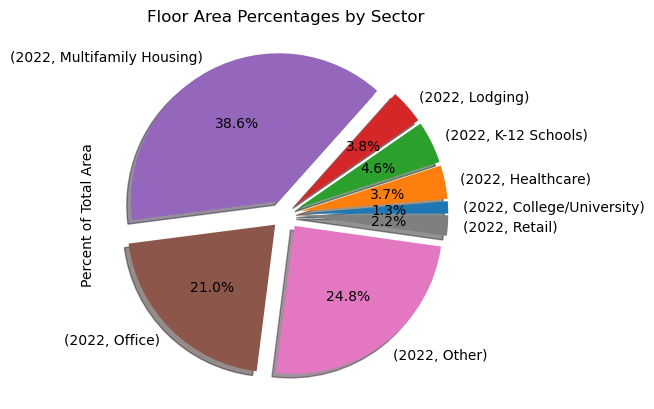

In [61]:
plot = sum_by_type_2022.plot.pie(y="Percent of Total Area", title = "Floor Area Percentages by Sector", 
                                 legend = False, autopct = '%1.1f%%', shadow = True, startangle = 0,
                                 explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plot.get_figure().savefig("Output\AreaPie.png")

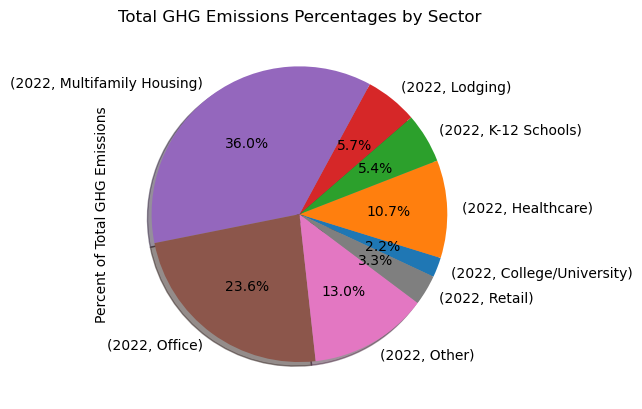

In [62]:
plot = sum_by_type_2022.plot.pie(y="Percent of Total GHG Emissions", title = "Total GHG Emissions Percentages by Sector", 
                                 legend = False, autopct = '%1.1f%%', shadow = True, startangle = -25)
plot.get_figure().savefig("Output\GHGPie.png")

In [11]:
index_id_df = reduced_df.set_index("ID")
sorted_by_id_df = index_id_df.sort_values(by = "ID",ascending=False)
sorted_by_id_df.head(10)

,Data Year,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,
260184,2022,NaN,2728 N HAMPDEN CT,2.0,False,LINCOLN PARK,Multifamily Housing,170000.0,1970.0,3070202.6,12991299.7,114.7,158.8,109.9,152.7,1094.4,7.8,41.931520,-87.642130
260184,2019,Hampden Green Condominium Association,2728 N HAMPDEN CT,1.0,False,LINCOLN PARK,Multifamily Housing,140000.0,1970.0,3008319.5,15088700.2,129.3,NaN,NaN,NaN,NaN,NaN,41.922011,-87.654620
260184,2018,Hampden Green Condominium Association,2728 N Hampden Court,1.0,False,LINCOLN PARK,Multifamily Housing,140000.0,1970.0,3399112.9,16960300.0,145.4,195.2,145.4,195.2,1466.3,10.5,41.922011,-87.654620
260184,2020,NaN,2728 N HAMPDEN CT,2.5,False,LINCOLN PARK,Multifamily Housing,170000.0,1970.0,2978140.4,13088799.9,114.8,157.7,115.3,158.3,1160.0,8.3,41.922011,-87.654620
260184,2021,Hampden Green Condominium Association,2728 N HAMPDEN CT,1.5,False,LINCOLN PARK,Multifamily Housing,170000.0,1970.0,3055237.9,13403999.9,117.6,161.6,115.5,159.4,1148.3,8.2,41.922011,-87.654620
260184,2017,Hampden Green Condominium Association,2728 N Hampden Court,NaN,NaN,LINCOLN PARK,Multifamily Housing,140000.0,1970.0,3351635.0,13849600.0,122.9,179.0,125.3,181.6,1355.3,9.7,41.922011,-87.654620
260184,2016,Hampden Green Condominium Association,2728 N Hampden Court,NaN,NaN,LINCOLN PARK,Multifamily Housing,140000.0,1970.0,3480335.5,15273500.2,134.0,192.6,130.3,188.8,1452.7,10.4,41.922011,-87.654620
260150,2019,Cummings Life Science Center,920 E 58th St,2.0,False,HYDE PARK,Laboratory,172408.0,1973.0,30536785.8,17100.0,416.1,783.4,413.8,NaN,7815.5,45.3,41.789880,-87.602764
260150,2015,Cummings Life Science Center,920 E. 58th St.,NaN,NaN,HYDE PARK,Laboratory,172408.0,1973.0,43021021.0,NaN,561.2,1158.4,564.5,1157.6,12211.0,70.8,41.789880,-87.602764


In [12]:
#reduced_df.to_json('benchmarking.json', orient='records', lines=True)

reduced_df.to_csv("benchmarks.csv",
                  encoding="utf-8", index=False, header=True)

In [13]:
grouped_by_year_type = w_sectors_df.groupby(["Data Year","Building_Sector"])

median_by_year_type = pd.DataFrame(grouped_by_year_type[["Chicago Energy Rating",  "Gross Floor Area - Buildings (sq ft)", 
                                               "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", 
                                               "GHG Intensity (kg CO2e/sq ft)"]].median())
median_by_year_type.to_csv("medianByYear.csv")
median_by_year_type

Chicago Energy Rating  \
Data Year Building_Sector                              
2014      College/University                     NaN   
          Healthcare                             NaN   
          K-12 Schools                           NaN   
          Office                                 NaN   
          Other                                  NaN   
...                                              ...   
2022      Lodging                                2.5   
          Multifamily Housing                    3.5   
          Office                                 3.5   
          Other                                  0.0   
          Retail                                 3.0   

                               Gross Floor Area - Buildings (sq ft)  \
Data Year Building_Sector                                             
2014      College/University                               499204.0   
          Healthcare                                       681807.0   
          K-12 Schools                                     298432.0   
          Office                                           698645.0   
          Other                                           1008416.0   
...                                                             ...   
2022      Lodging                                          201402.0   
          Multifamily Housing                              145338.0   
          Office                                           272235.0   
          Other                                             91222.5   
          Retail                                           109634.0   

                               Weather Normalized Source EUI (kBtu/sq ft)  \
Data Year Building_Sector                                                   
2014      College/University                                       209.50   
          Healthcare                                               444.00   
          K-12 Schools                                             142.00   
          Office                                                   201.00   
          Other                                                    250.00   
...                                                                   ...   
2022      Lodging                                                  186.35   
          Multifamily Housing                                      119.65   
          Office                                                   144.70   
          Other                                                    180.90   
          Retail                                                   220.00   

                               Total GHG Emissions (Metric Tons CO2e)  \
Data Year Building_Sector                                               
2014      College/University                                  6071.00   
          Healthcare                                         17968.00   
          K-12 Schools                                        2737.00   
          Office                                              8846.00   
          Other                                              19192.00   
...                                                               ...   
2022      Lodging                                             1836.15   
          Multifamily Housing                                  769.85   
          Office                                              1851.60   
          Other                                               1081.15   
          Retail                                              1159.50   

                               GHG Intensity (kg CO2e/sq ft)  
Data Year Building_Sector                                     
2014      College/University                           12.80  
          Healthcare                                   26.77  
          K-12 Schools                                  8.60  
          Office                                       12.85  
          Other                                 

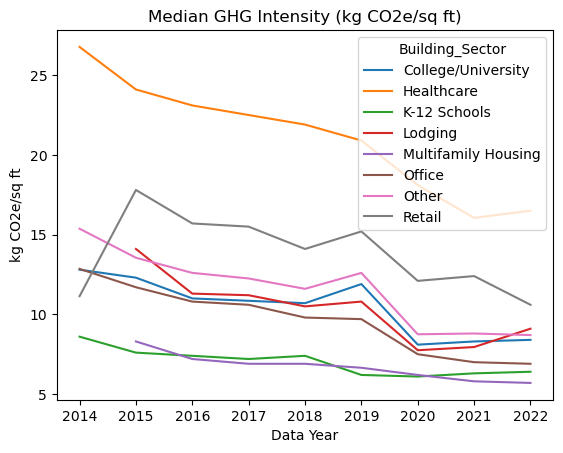

In [32]:
plot = median_by_year_type.pivot_table(values = "GHG Intensity (kg CO2e/sq ft)", index = "Data Year", columns = "Building_Sector").plot()
plot.set_ylabel("kg CO2e/sq ft")
plot.set_title("Median GHG Intensity (kg CO2e/sq ft)")
plot.get_figure().savefig("Output\Fig_5.png")

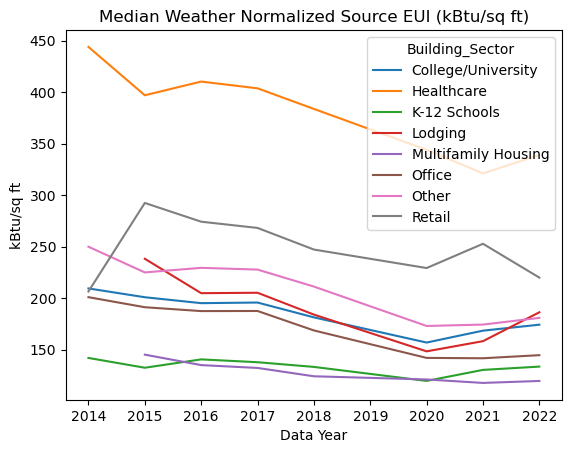

In [33]:
plot = median_by_year_type.pivot_table(values = "Weather Normalized Source EUI (kBtu/sq ft)", index = "Data Year", columns = "Building_Sector").plot()
plot.set_ylabel("kBtu/sq ft")
plot.set_title("Median Weather Normalized Source EUI (kBtu/sq ft)")
plot.get_figure().savefig("Output\Fig_6.png")

In [200]:
nineteen_sectors = only_2019_df.groupby(["Building_Sector"])
nineteen_medians = pd.DataFrame(nineteen_sectors[["Weather Normalized Site EUI (kBtu/sq ft)", "GHG Intensity (kg CO2e/sq ft)"]].median())

nineteen_medians

,Weather Normalized Site EUI (kBtu/sq ft),GHG Intensity (kg CO2e/sq ft)
Building_Sector,,
College/University,110.20,11.90
Healthcare,213.95,20.90
K-12 Schools,68.00,6.20
Lodging,111.00,10.80
Multifamily Housing,75.40,6.65
Office,83.10,9.70
Other,81.35,12.60
Retail,129.60,15.20


In [201]:
count_by_year_type = pd.DataFrame(grouped_by_year_type[["Chicago Energy Rating",  "Gross Floor Area - Buildings (sq ft)", 
                                               "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", 
                                               "GHG Intensity (kg CO2e/sq ft)"]].count())


In [247]:
sum_by_year_type = pd.DataFrame(grouped_by_year_type[["Gross Floor Area - Buildings (sq ft)", "Weather Normalized Source EUI (kBtu/sq ft)", 
                                            "Total GHG Emissions (Metric Tons CO2e)"]].sum())
sum_by_year_type.to_csv("GHGsum.csv")
sum_by_year_type.to_json("sums.json")
sum_by_year_type

Gross Floor Area - Buildings (sq ft)  \
Data Year Building_Sector                                             
2014      College/University                             11903647.0   
          Healthcare                                     19942175.0   
          K-12 Schools                                    8242916.0   
          Office                                        139750940.0   
          Other                                          31774325.0   
...                                                             ...   
2022      Lodging                                        33203204.0   
          Multifamily Housing                           339823069.3   
          Office                                        184321670.0   
          Other                                         217891241.9   
          Retail                                         19583429.0   

                               Weather Normalized Source EUI (kBtu/sq ft)  \
Data Year Building_Sector                                                   
2014      College/University                                       3195.0   
          Healthcare                                               9488.0   
          K-12 Schools                                             3993.0   
          Office                                                  31354.3   
          Other                                                    6167.0   
...                                                                   ...   
2022      Lodging                                                 18784.7   
          Multifamily Housing                                    176451.0   
          Office                                                  51764.1   
          Other                                                   51412.4   
          Retail                                                  30238.5   

                               Total GHG Emissions (Metric Tons CO2e)  
Data Year Building_Sector                                              
2014      College/University                                 195804.0  
          Healthcare                                         557634.0  
          K-12 Schools                                        81392.0  
          Office                                            1866504.0  
          Other                                              432048.0  
...                                                               ...  
2022      Lodging                                            279928.3  
          Multifamily Housing                               1756238.9  
          Office                                            1151148.2  
          Other                                              633855.4  
          Retail                                             160704.9  

[70 rows x 3 columns]

In [241]:
area2022_bySector =[]
for i in range(62-64):
    print(sum_by_year_type.iloc[i,1])



In [203]:
grouped_by_year = w_sectors_df.groupby(["Data Year"])

median_by_year = pd.DataFrame(grouped_by_year[["Chicago Energy Rating",  "Gross Floor Area - Buildings (sq ft)", 
                                               "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", 
                                               "GHG Intensity (kg CO2e/sq ft)"]].median())

median_by_year
median_by_year.to_excel("medianjustyear.xlsx")

In [250]:
# calculating sums by year
sum_by_year = pd.DataFrame(grouped_by_year[["Gross Floor Area - Buildings (sq ft)", "Weather Normalized Source EUI (kBtu/sq ft)", 
                                            "Total GHG Emissions (Metric Tons CO2e)"]].sum())

sum_by_year.to_excel("sumjustyear.xlsx")

Totals2022 = sum_by_year.iloc[8,:]
Totals2021 = sum_by_year.iloc[7,:]
Totals2020 = sum_by_year.iloc[6,:]
Totals2019 = sum_by_year.iloc[5,:]
Totals2018 = sum_by_year.iloc[4,:]
Totals2017 = sum_by_year.iloc[3,:]
sum_by_year


,Gross Floor Area - Buildings (sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e)
Data Year,,,
2014,214594725.0,55047.3,3166483.0
2015,518974532.0,343240.3,6395904.0
2016,664074597.8,491638.3,7032092.3
2017,676077299.0,487001.1,6933239.2
2018,768245376.8,467313.9,6795824.8
2019,566432766.7,0.0,3609546.8
2020,867163920.0,456783.2,5817022.8
2021,861265211.9,415567.1,4913124.1
2022,879525219.2,397895.0,4873918.1


In [252]:
new_df=sum_by_year_type.merge(sum_by_year, how='outer', on="Data Year")
new_df

,Gross Floor Area - Buildings (sq ft)_x,Weather Normalized Source EUI (kBtu/sq ft)_x,Total GHG Emissions (Metric Tons CO2e)_x,Gross Floor Area - Buildings (sq ft)_y,Weather Normalized Source EUI (kBtu/sq ft)_y,Total GHG Emissions (Metric Tons CO2e)_y
Data Year,,,,,,
2014,11903647.0,3195.0,195804.0,214594725.0,55047.3,3166483.0
2014,19942175.0,9488.0,557634.0,214594725.0,55047.3,3166483.0
2014,8242916.0,3993.0,81392.0,214594725.0,55047.3,3166483.0
2014,139750940.0,31354.3,1866504.0,214594725.0,55047.3,3166483.0
2014,31774325.0,6167.0,432048.0,214594725.0,55047.3,3166483.0
...,...,...,...,...,...,...
2022,33203204.0,18784.7,279928.3,879525219.2,397895.0,4873918.1
2022,339823069.3,176451.0,1756238.9,879525219.2,397895.0,4873918.1
2022,184321670.0,51764.1,1151148.2,879525219.2,397895.0,4873918.1


In [205]:
count_by_year = pd.DataFrame(grouped_by_year[["Chicago Energy Rating",  "Gross Floor Area - Buildings (sq ft)", 
                                               "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", 
                                               "GHG Intensity (kg CO2e/sq ft)"]].count())

count_by_year
count_by_year.to_excel("countjustyear.xlsx")